# Instrunment Paper plots

In [48]:
# import necessary modules
import matplotlib.pyplot as plt
import raadpy as rp
import pandas as pd
import numpy as np
import os
from scipy.signal import savgol_filter

# Define some constants
raw_dir = '../../Data/FULL_DATA/JAN/'
# SD      = '2022-09-19' 
# raw_dir = '../../Data/Light-1/light1-'+SD+'/'

# Get the subfiles and put the in a dictionary
fnames      = os.listdir(raw_dir)
filenames   = {}
for i in range(1,10): 
    res = [name for name in fnames if f'buff{i}' in name]
    if len(res)>0: filenames[f'buff{i}'] = res[0]
for name in fnames: 
    if 'log' in name: filenames['log'] = name

print(filenames)

%matplotlib widget

{'buff1': 'light1-2022-03-04-buff1.dat', 'buff2': 'light1-2022-08-04-buff2.dat', 'buff3': 'light1-2022-08-02-buff3.dat', 'buff4': 'light1-2022-03-04-buff4.dat', 'buff5': 'light1-2022-03-04-buff5.dat', 'buff6': 'light1-2022-03-08-buff6.dat', 'buff7': 'light1-2022-03-08-buff7.dat', 'log': 'light1-se-log.txt'}


In [4]:
# Directory of the buffer
# buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff1.dat'
# Or:
buffer_fname    = raw_dir + filenames['buff1']

SIPM_ID     = 0
PMT_ID      = 1
PAYLOAD_ID  = PMT_ID

# Decode the buffer data in a dictionary
full_data   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition=f"data['id_bit'] == {PAYLOAD_ID}")

Line:   0%|          | 0/349101 [00:00<?, ?it/s]

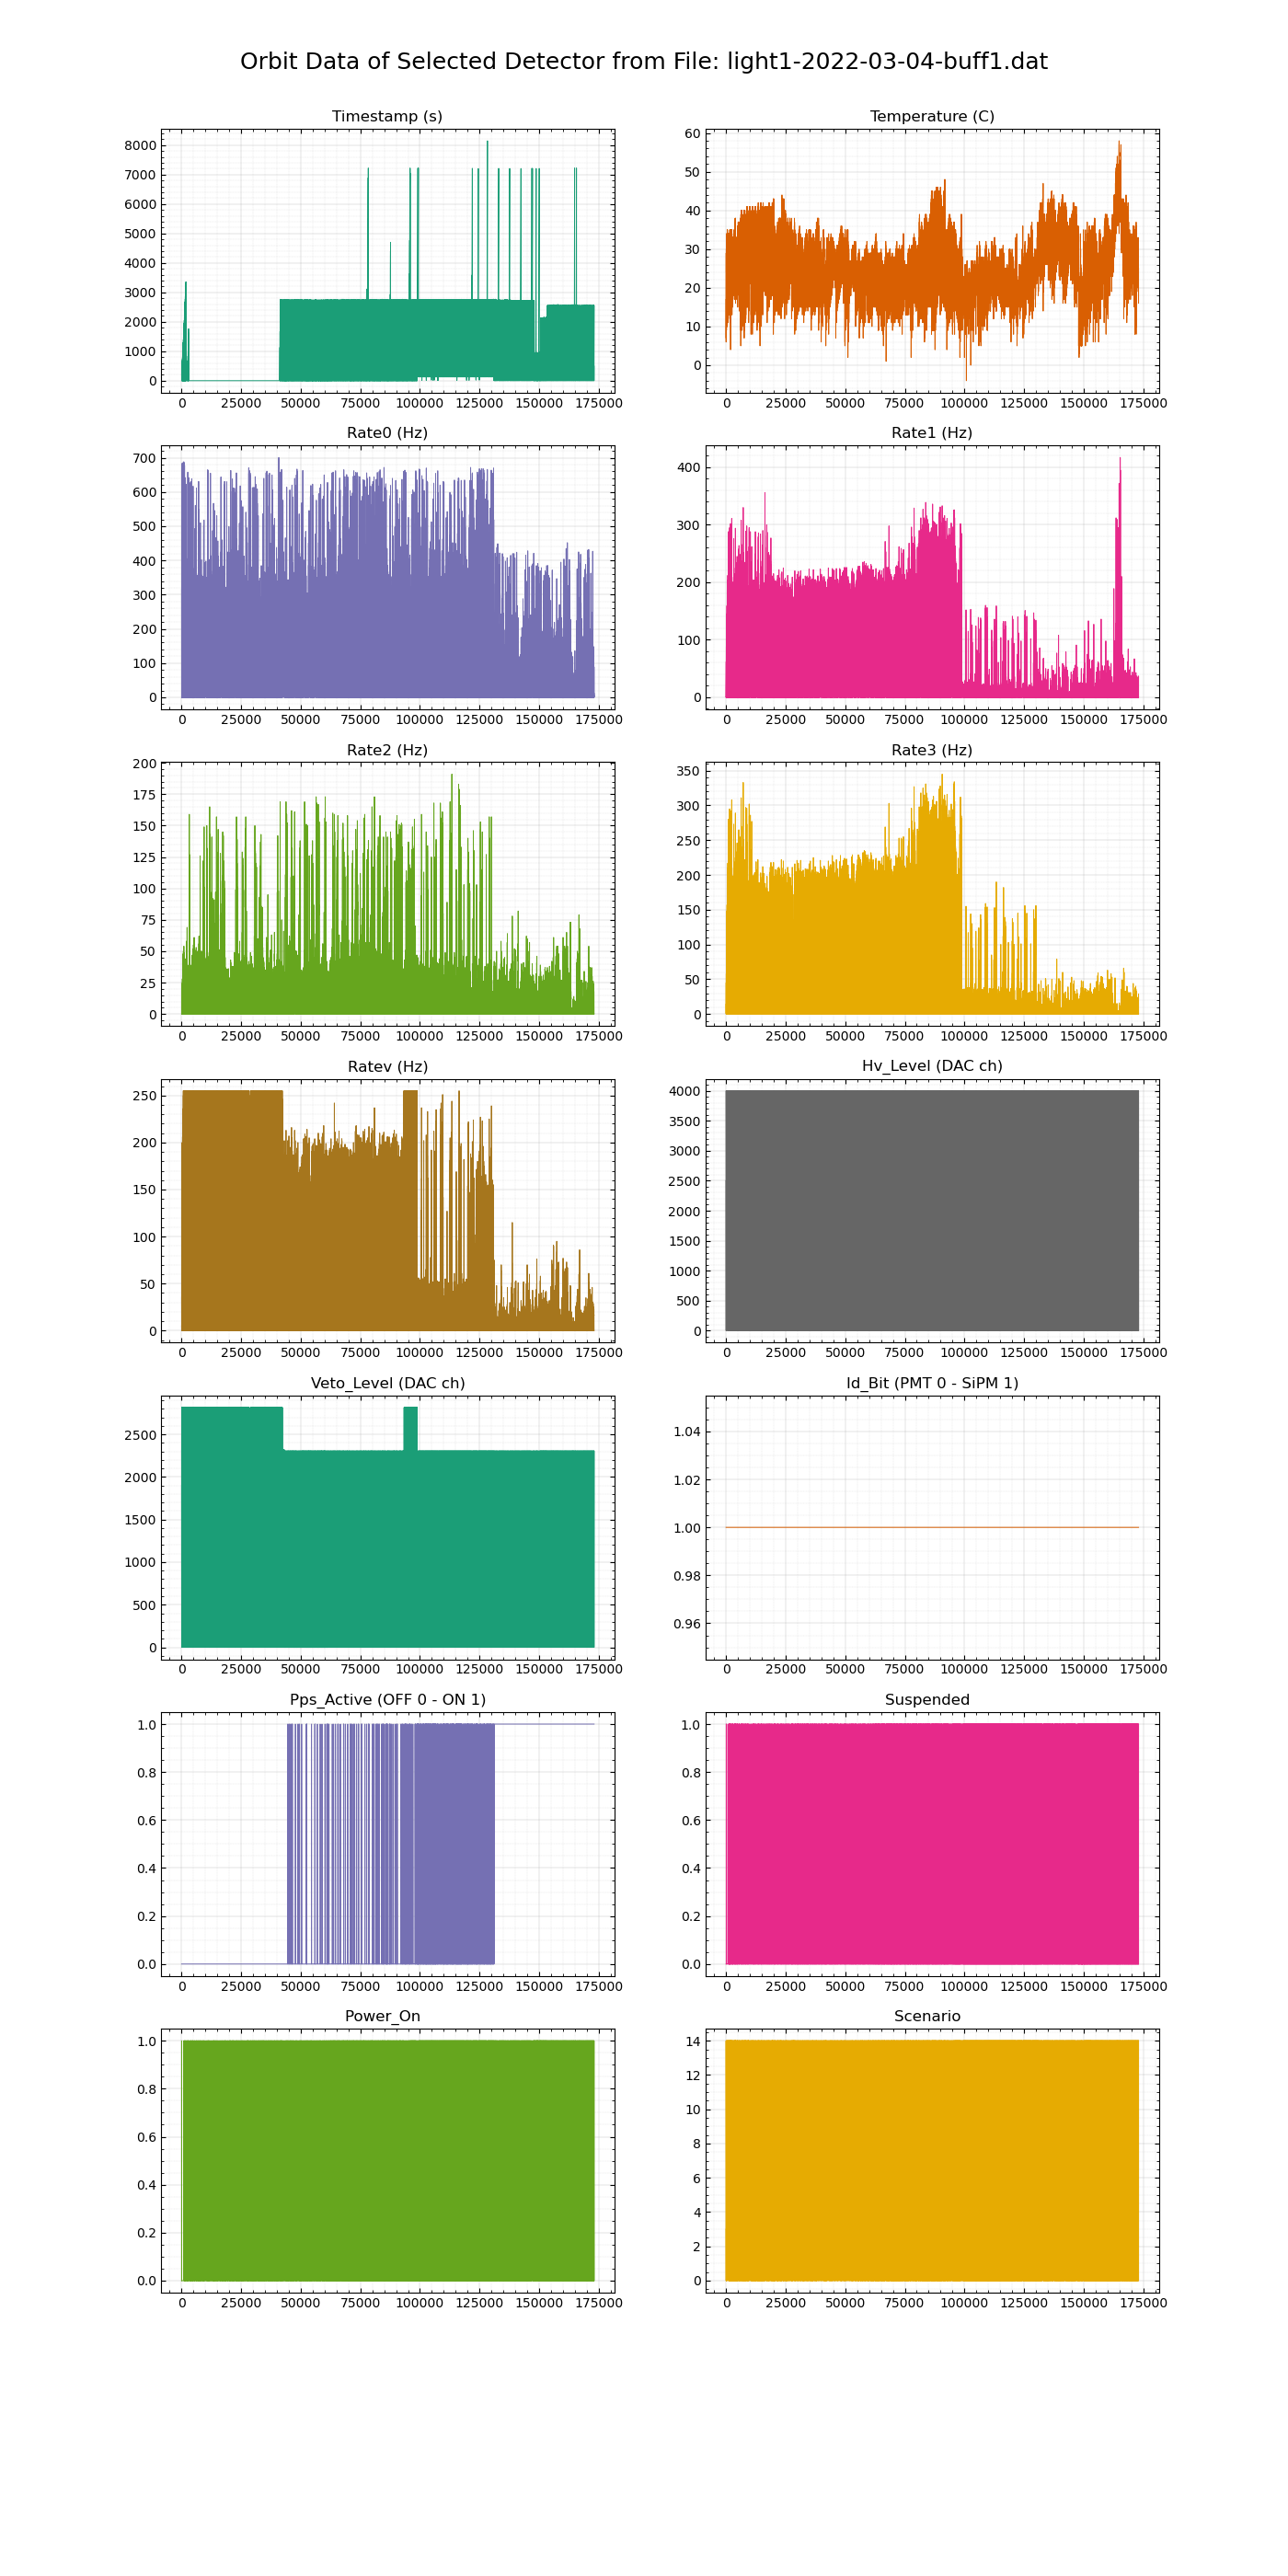

In [5]:
# Now print the Data
fig, axes  = rp.plot_buffer(full_data,title = 'Orbit Data of Selected Detector from File: '+ filenames['buff1'],UNITS=rp.ORBIT_UNITS)

# Number of Restarts

In [12]:
# Count the number of restarts
restarts = np.unique(full_data['power_on'],return_counts=True)[1][1]
print(rp.bcolors.OKBLUE+'Number of restarts: '+rp.bcolors.OKGREEN+rp.bcolors.BOLD+str(restarts)+rp.bcolors.ENDC)

Number of restarts: 1871


# Complete Mission Temperature

In [30]:
# Get the full data from both
complete_data   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT)

# Get PMT Data
idx_p     = np.where(complete_data['id_bit'] == PMT_ID)[0]
pmt_data  = dict(zip(rp.ORBIT_STRUCT.keys(),[np.array(arr)[idx_p] for arr in complete_data.values()]))

# Get SiPM Data
idx_s     = np.where(complete_data['id_bit'] == SIPM_ID)[0]
sipm_data = dict(zip(rp.ORBIT_STRUCT.keys(),[np.array(arr)[idx_s] for arr in complete_data.values()]))

Line:   0%|          | 0/349101 [00:00<?, ?it/s]

(-7.85, 61.1)

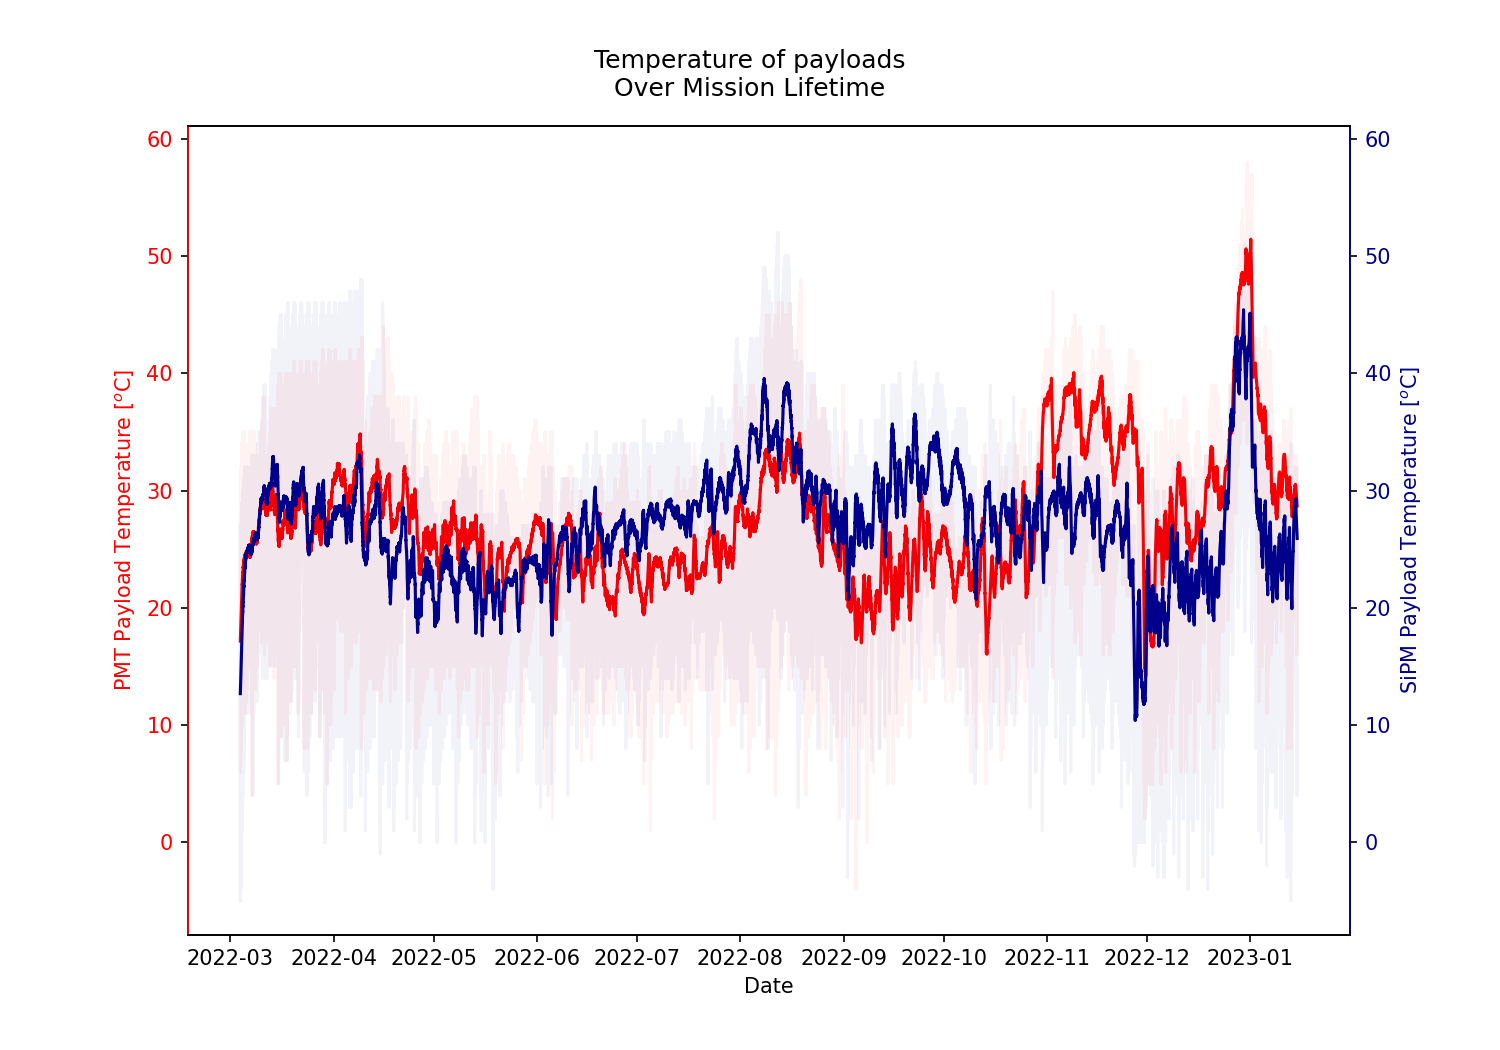

In [61]:
# Create the temperature plot

# Create the figure
fig     = plt.figure(figsize=(10,7),dpi=150)
ax0     = fig.add_subplot(111)
ax1     = ax0.twinx()
color   = ['red','darkblue']

# Get the date Range
dates = pd.date_range(start="2022-03-04",end="2023-01-15",periods=len(pmt_data['temperature']))

# Plot the temperature
ax0.plot(dates, pmt_data['temperature'],c=color[0],alpha=0.05)
ax0.plot(dates, savgol_filter(pmt_data['temperature'],401,1),c=color[0])

# Get the date Range
dates = pd.date_range(start="2022-03-04",end="2023-01-15",periods=len(sipm_data['temperature']))

# Plot pressure
ax1.plot(dates, sipm_data['temperature'],c=color[1],alpha=0.05)
ax1.plot(dates, savgol_filter(sipm_data['temperature'],401,1),c=color[1])

# Prettify
# ax0.set_xlim(0,max(new_time[idx]))
ax1.spines['left'].set_color(color[0])
ax1.spines['right'].set_color(color[1])
ax1.tick_params(axis ='y', labelcolor = color[1])
ax0.tick_params(axis ='y', labelcolor = color[0])
ax0.set_ylabel(r'PMT Payload Temperature [$^o$C]', color = color[0])
ax1.set_ylabel(r'SiPM Payload Temperature [$^o$C]', color = color[1])
ax0.set_xlabel('Date')
fig.suptitle('\nTemperature of payloads\nOver Mission Lifetime');
M = np.max([ax0.get_ylim(),ax1.get_ylim()])
m = np.min([ax0.get_ylim(),ax1.get_ylim()])
ax0.set_ylim(m,M)
ax1.set_ylim(m,M)

-7.85